## MNS_Practical 6: Leonard Hollander

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

$\textbf{Exercise 1: The Potassium Channel}$

In [3]:

def alpha (V):
    
    return .01 * (V + 55) / (1 - np.exp(-.1 * (V + 55)))

def beta (V):

    return .125 * np.exp(-.0125 * (V + 65))

#Time dependent dynamics of the potassium channel:

n_0 = .3177

dn = lambda n, t, V: alpha(V) * (1 - n) - beta(V) * n
n = lambda V: euler(lambda n, t: dn(n,t, V), n_0, 25, .01)

In [4]:
#Defining some constants:

E_k = -77 #mV
gk_max = 36 #nS

#Equation for the potassium current:

I_k = lambda V: gk_max * np.power(n(V),4) * (V - E_k)

In [5]:
def euler(f_func, x_0, t_max, dt):
    
    x = x_0
    nsteps = int(t_max / dt)
    xs = np.zeros(nsteps)
    xs[0] = x_0
    i = 1
    t = 0
    
    while i < nsteps:
        
        x = x + f_func(x,t)*dt
        xs[i] = x
        t += dt
        i += 1
    
    return xs

$\textbf{Part [b]: Activation constant and steady state}$

Text(0, 0.5, 'Percentage of open ion channels')

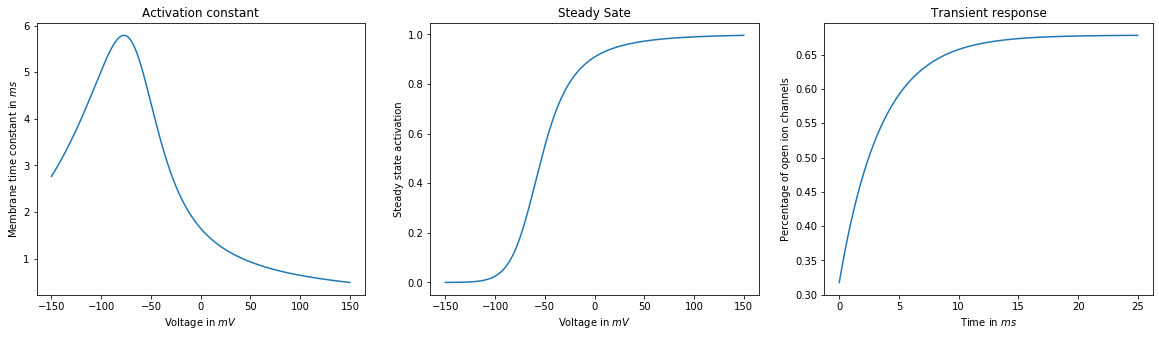

In [6]:
activation_constant = lambda V: 1 / (alpha(V) + beta(V))
np.vectorize(activation_constant)
voltage_range = np.arange(-150, 150,.1)

steady_state = lambda V: alpha(V) / (alpha(V) + beta(V))
np.vectorize(steady_state)

#Plotting the results:

fig, axs = plt.subplots(1,3, sharex = False, sharey = False, figsize = (20,5))

#Membrane time constant:

axs[0].plot(voltage_range, activation_constant(voltage_range))
axs[0].set_title('Activation constant')
axs[0].set_xlabel('Voltage in $mV$')
axs[0].set_ylabel('Membrane time constant in $ms$')

#Steady state:

axs[1].plot(voltage_range, steady_state(voltage_range))
axs[1].set_title('Steady Sate')
axs[1].set_xlabel('Voltage in $mV$')
axs[1].set_ylabel('Steady state activation')

#Transient response:

axs[2].plot(np.arange(0,25, .01), n(-40))
axs[2].set_title('Transient response')
axs[2].set_xlabel('Time in $ms$')
axs[2].set_ylabel('Percentage of open ion channels')

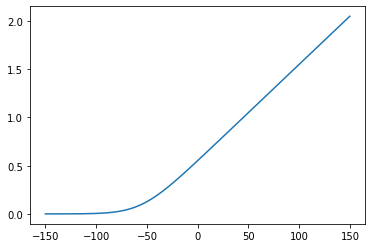

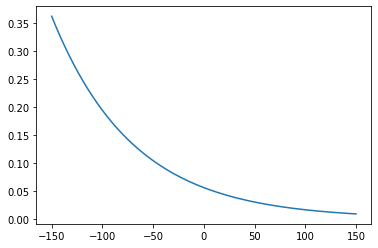

In [9]:
plt.figure()

alpha2 = np.vectorize(alpha)
beta2 = np.vectorize(beta)
plt.plot(voltage_range, alpha2(voltage_range))
plt.figure()
plt.plot(voltage_range, beta2(voltage_range))

The plots show the relationship between voltage and (1) the time constant, i.e. the time it takes for the potassium current to decay to its $\approx$ 37% (= $\frac{1}{e}$) of its initial value (2) the steady state activation. The third plot shows the percentage of open potassium channels against time at a constant voltage of -40 $mV$. The shape of this curve matches the description provided for checking.

$\textbf{Part [c]: Voltage clamp}$


"\n\n\n\nfor mV in np.arange(-50,50,20):\n\n   \n    axs[2].plot(seconds, potassium_clamp(n, 100, mV) / 1000,  #converting to nano\n            label = '{} $mV$'.format(mV))\n    axs[2].set_xlabel('Time in $ms$')\n    axs[2].set_ylabel('Potassium current in nA')\n    axs[2].legend()\n\n"

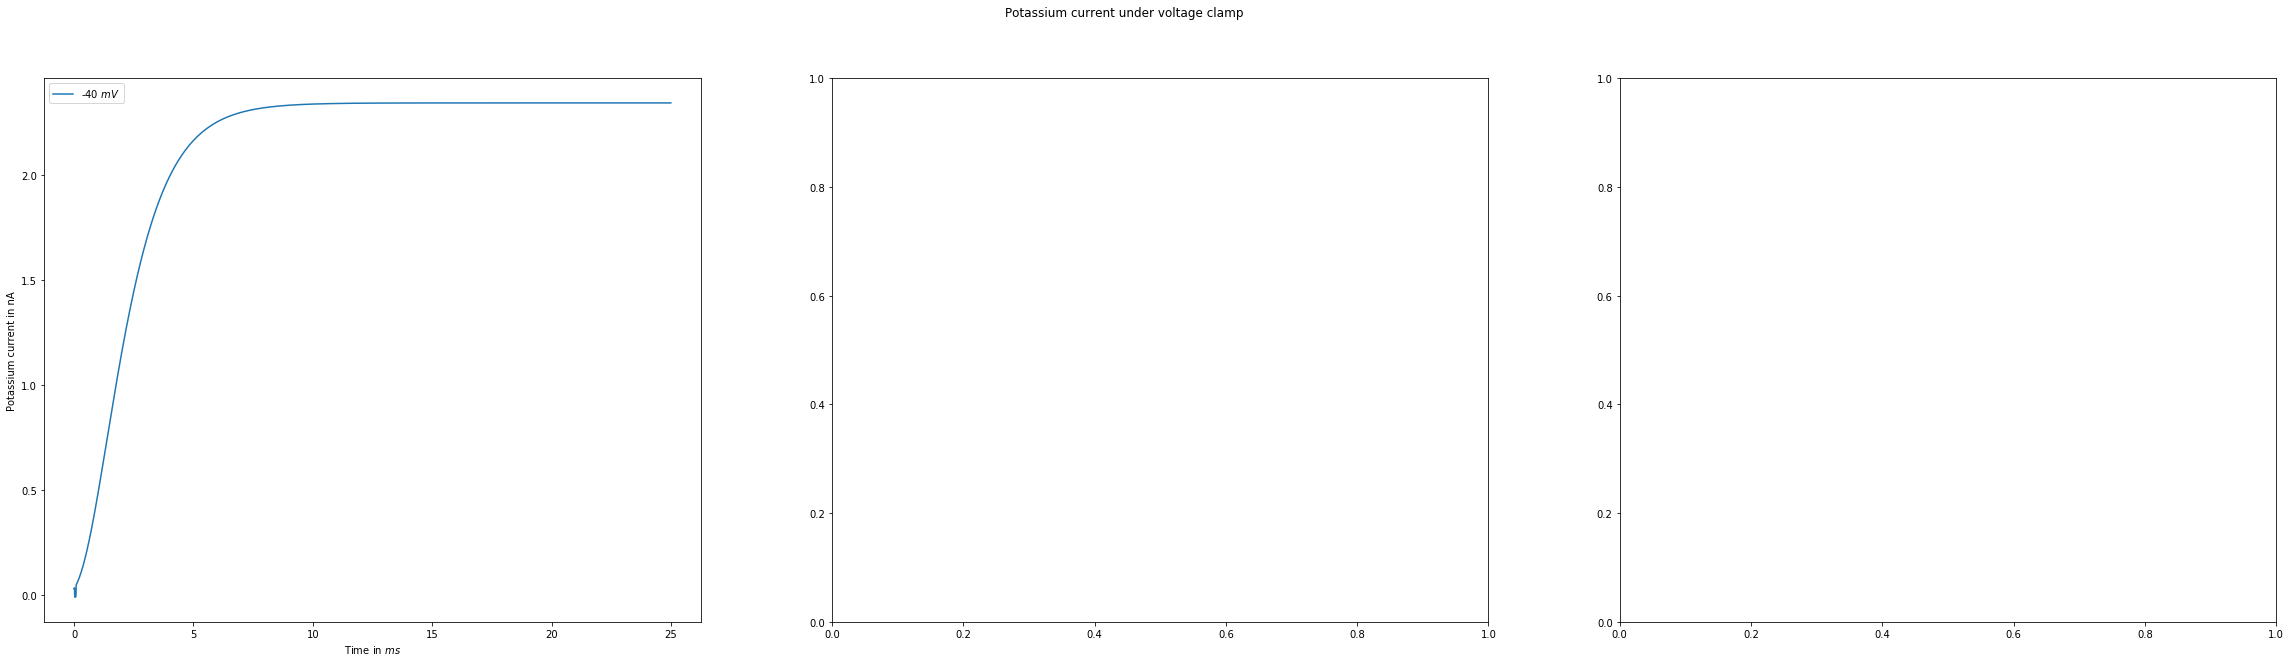

In [12]:
#Write a new function, returning the values:

def potassium_clamp (n,tbegin, tstop, V_c):
    
    clamped = I_k(-100)
    unclamped = I_k(V_c)
    
    result = np.zeros(clamped.shape[0])
    result[:tbegin+1] = unclamped[:tbegin+1]
    result[tbegin+1: tstop] = clamped[tbegin+1: tstop]
    result[tstop+1:] = unclamped[tstop+1:]
    
    return result

seconds = np.arange(0,25,.01)

fig, axs = plt.subplots(1,3, figsize = (40,10))

plt.suptitle('Potassium current under voltage clamp')
"""

axs[0].plot(seconds, potassium_clamp(n, 100, -40) / 1000, label = '-40 $mV$')
axs[0].set_xlabel('Time in $ms$')
axs[0].set_ylabel('Potassium current in nA')
axs[0].legend()

axs[1].plot(seconds, potassium_clamp(n, 100, -80) / 1000, label = '-80 $mV$')
axs[1].set_xlabel('Time in $ms$')
axs[1].set_ylabel('Potassium current in nA')
axs[1].legend()

"""

axs[0].plot(seconds, potassium_clamp(n, 2,8, 10) / 1000, label = '-40 $mV$')
axs[0].set_xlabel('Time in $ms$')
axs[0].set_ylabel('Potassium current in nA')
axs[0].legend()


"""



for mV in np.arange(-50,50,20):

   
    axs[2].plot(seconds, potassium_clamp(n, 100, mV) / 1000,  #converting to nano
            label = '{} $mV$'.format(mV))
    axs[2].set_xlabel('Time in $ms$')
    axs[2].set_ylabel('Potassium current in nA')
    axs[2].legend()

"""

The left plot shows the current for a relatively large voltage of -40 $mV$, the middle for a relatively small current of -80 $mV$ and the right plot relates the I-V curves for different voltages in the specified interval. We can learn a number of things from this experiment: One, as long as the voltage is clamped at -65$mV$ – since this is very close to the reversal potential for potassium – we can only get a very weak ionic current. Two, the closer we bring $V_c$ to the reversal potential, the smaller the currents that we eventually see.  Thirdly, the shape of the plot can be directly related to the $\tau_n$ and $n_{\infty}$ that we plotted earlier. The current saturates, because as the $n_{\infty}$ plot shows, the opened channels eventually reach a steady state. In this state, the net amount of open channels no longer changes, so the current can no longer increase. The time constant, roughly, $\tau_n$ quantifies the exponential decay of the current. For a rise in the current this means that we should look for around what time the current reaches about 67% of its final value ($I_max \cdot (1 - \frac{1}{e}))$. The $\tau_n$ plot has its maximum roughly between -60 and -70 $mV$. By comparing the -40 $mV$ curve in the left plot with the -60 $mV$ curve in the rightmost plot, we can confirm that the rate of decay is actually mirrored in the shape of the curves (the curve in the right plot "\textit{rises}" much more slowly than that in the leftmost plot.

$\textbf{Part [d]: Current-voltage-relation}$

Text(0, 0.5, 'Potassium current in nA')

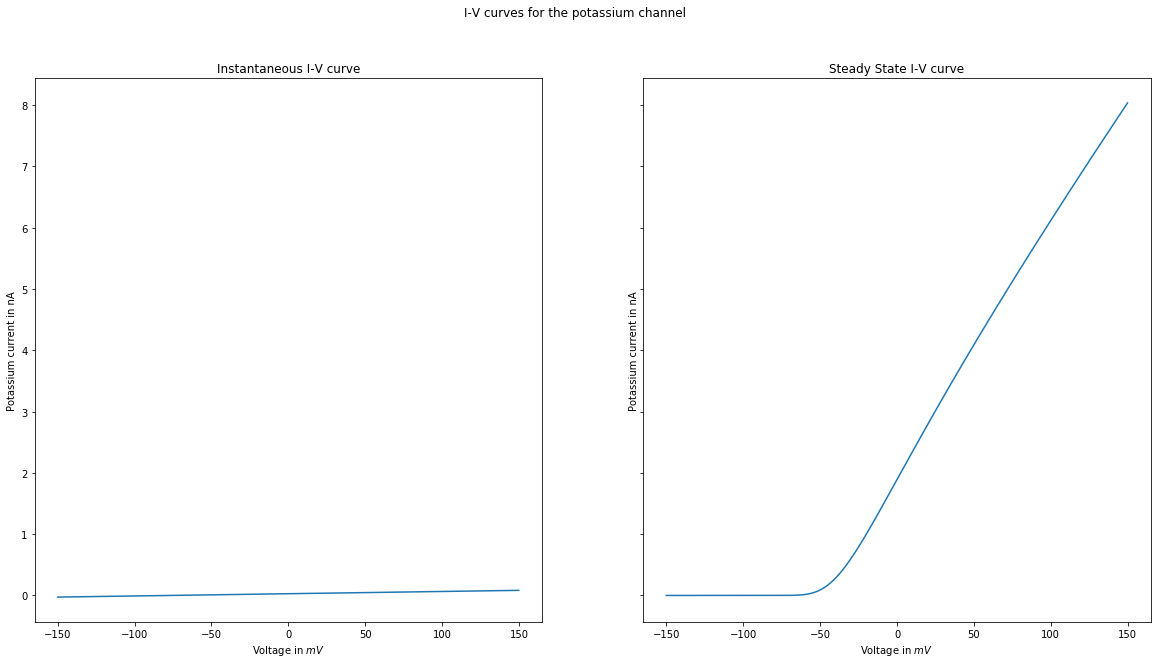

In [114]:
current = gk_max * np.power(n_0, 4) * (voltage_range - E_k) / 1000 #converting to nano

steady_state_current = lambda V: gk_max * np.power(steady_state(V),4) * (V - E_k)
np.vectorize(steady_state_current)

fig, axs = plt.subplots(1,2, sharex = True, sharey = True, figsize = (20,10))

plt.suptitle('I-V curves for the potassium channel')

axs[0].plot(voltage_range, current)
axs[0].set_title('Instantaneous I-V curve')
axs[0].set_xlabel('Voltage in $mV$')
axs[0].set_ylabel('Potassium current in nA')

axs[1].plot(voltage_range, steady_state_current(voltage_range) / 1000) # converting to nano
axs[1].set_title('Steady State I-V curve')
axs[1].set_xlabel('Voltage in $mV$')
axs[1].set_ylabel('Potassium current in nA')
 

These two plots together make a lot of sense. The instantaneous plot shows the I-V curve for one particular instant of the membrane (amount of open channels kept constant at the value of $n_0$). The right plot shows the current when the number of open channels is equal to the number pf channels in the steady state for that voltage. We can see that the current is close zero for small voltages, because – as we know from the earlier plot – for those voltages only a very small number of channels are open, then rises quickly as the channels begin to open.

$\textbf{Exercise 2: The Sodium Channel}$

In [12]:
#Defining initial conditions:

m_0 = .0529
h_0 = .5961

In [88]:
def alpha_m (V):
    
    return (.1 * (V + 40)) / (1 - np.exp(-.1 * (V + 40)))

def beta_m (V):

    return 4 * np.exp(-.0556 * (V + 65))

def alpha_h (V):
    
    return .07 * np.exp(-.05 * (V + 65))

def beta_h (V):

    return 1 / (1 + np.exp(-.1 * (V + 35)))

In [89]:
#Sodium constants:

E_Na = 50
gNa_max = 120

#Solving the system of ODEs:

dm = lambda m, t, V: alpha_m(V) * (1 - m) - beta_m(V) * m
m = lambda V: euler(lambda m, t: dm(m,t, V), m_0, 25, .01)

dh = lambda h, t, V: alpha_h(V) * (1 - h) - beta_h(V) * h
h = lambda V: euler(lambda h, t: dh(h,t, V), h_0, 25, .01)

#Time dependent dynamics of the sodium channel:

I_Na = lambda V: gNa_max * np.power(m(V),3) * h(V) * (V - E_Na)

Text(0, 0.5, 'Steady state activation')

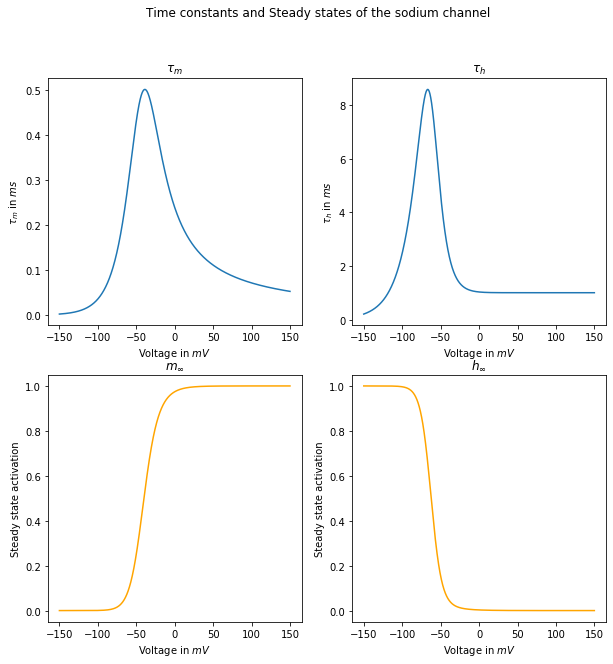

In [92]:
m_constant = lambda V: 1 / (alpha_m(V) + beta_m(V))
h_constant = lambda V: 1 / (alpha_h(V) + beta_h(V))
np.vectorize(h_constant), np.vectorize(m_constant)

m_steady_state = lambda V: alpha_m(V) / (alpha_m(V) + beta_m(V))
h_steady_state = lambda V: alpha_h(V) / (alpha_h(V) + beta_h(V))

#Plotting the results:

fig, axs = plt.subplots(2,2, sharex = False, sharey = False, figsize = (10,10))

plt.suptitle('Time constants and Steady states of the sodium channel')

#Membrane time constants:

axs[0,0].plot(voltage_range, m_constant(voltage_range))
axs[0,0].set_title(r'$\tau_m$')
axs[0,0].set_xlabel('Voltage in $mV$')
axs[0,0].set_ylabel(r'$\tau_m$ in $ms$')

axs[0,1].plot(voltage_range, h_constant(voltage_range))
axs[0,1].set_title(r'$\tau_h$')
axs[0,1].set_xlabel('Voltage in $mV$')
axs[0,1].set_ylabel(r'$\tau_h$ in $ms$')

#Steady states:

axs[1,0].plot(voltage_range, m_steady_state(voltage_range), c = 'orange')
axs[1,0].set_title(r'$m_{\infty}$')
axs[1,0].set_xlabel('Voltage in $mV$')
axs[1,0].set_ylabel(r'Steady state activation')

axs[1,1].plot(voltage_range, h_steady_state(voltage_range), c = 'orange')
axs[1,1].set_title(r'$h_{\infty}$')
axs[1,1].set_xlabel('Voltage in $mV$')
axs[1,1].set_ylabel(r'Steady state activation')

#plt.tight_layout()

It is interesting that the product $m_{\infty}$, $h_{\infty}$ is only rarely non-zero. Contrary to what we would expect – and contrary to what is in fact true for the potassium channel – we therefore cannot expect the sodium current to be strongest when the voltage is maximally far away from sodium's own reversal potential. Rather, we should sort of see ' a narrow corridor' of activity with a peak somewhere around -30 $mV$.

$\textbf{Part [b]: Gating  of the Sodium Channel}:$

Text(0, 0.5, 'Current in nA')

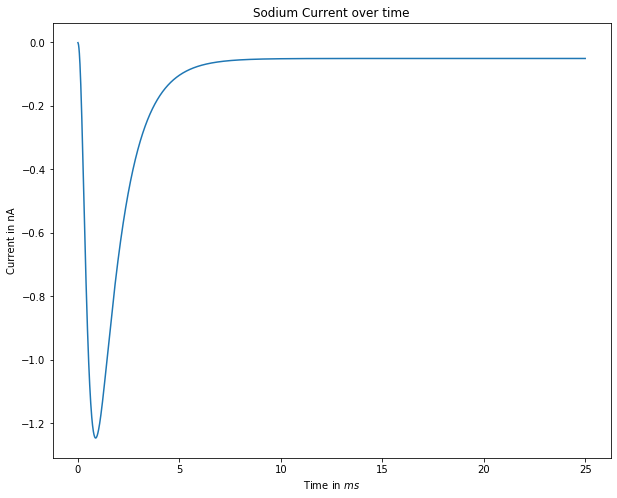

In [113]:
plt.figure(figsize = (10,8))
plt.plot(seconds, I_Na(-20) / 1000) # converting to micro
plt.title('Sodium Current over time')
plt.xlabel('Time in $ms$')
plt.ylabel('Current in nA')

Here the shape of the plot seems exactly right (in qualitative terms). The numerical values also are exactly as suggested. When we unclamp the voltage, sodium moves into the cell in order to push closer to its reversal potential. At -20$mV$ an inward stream of sodium causes the voltage to increase. As the voltage increases more and more channels change their state from active to inactivated. As a consequence, the current abates. 

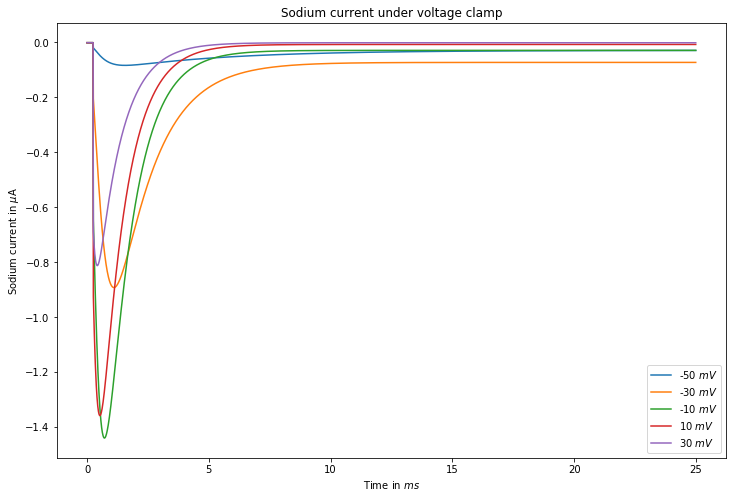

In [127]:
def sodium_clamp (m, h, t, V_c):
    
    clamped = I_Na(-65)
    unclamped = I_Na(V_c)
    
    result = np.zeros(clamped.shape[0])
    result[:t+1] = clamped[:t+1]
    result[t+1:] = unclamped[t+1:]

    return result


plt.figure(figsize = (12,8))
for mV in np.arange(-50,50,20):
    plt.plot(seconds, sodium_clamp(m,h, 25, mV) / 1000, 
            label = '{} $mV$'.format(mV))
    plt.title('Sodium current under voltage clamp')
    plt.xlabel('Time in $ms$')
    plt.ylabel('Sodium current in $\mu$A')
    plt.legend()


Again, the shape of the curves is as expected. The curves for very small voltages are close to zero, simply because at those voltages most of the channels are inactive. As the voltage get more positive, more channels are activated and we get a negative current as sodium moves into the cell. As the cell is depolarised, the channels are deactivated and the current abates.

$\textbf{Part[d]: Current-voltage-relation}$

Text(0, 0.5, 'Potassium current in $\\mu$A')

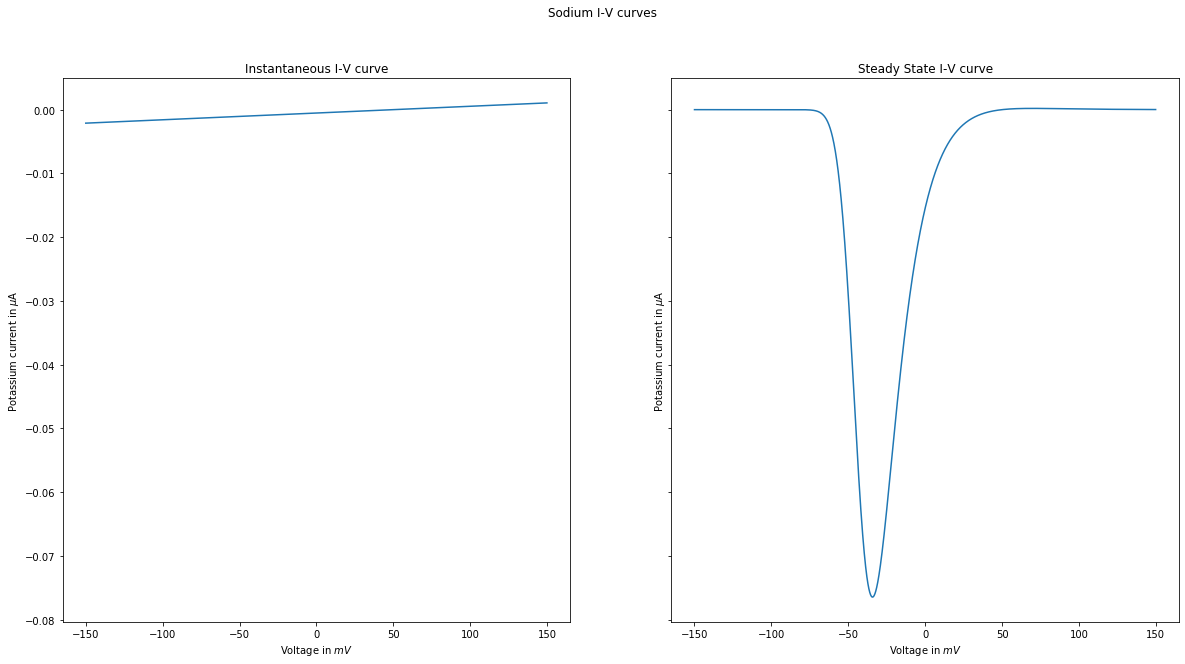

In [97]:
sodium_current = gNa_max * np.power(m_0, 3) * h_0 * (voltage_range - E_Na) / 1000 #converting to micro

sodium_ss_cur = lambda V: gNa_max * np.power(m_steady_state(V),3) * h_steady_state(V) * (V - E_Na)
np.vectorize(sodium_ss_cur)

fig, axs = plt.subplots(1,2, sharex = True, sharey = True, figsize = (20,10))

plt.suptitle('Sodium I-V curves')

axs[0].plot(voltage_range, sodium_current)
axs[0].set_title('Instantaneous I-V curve')
axs[0].set_xlabel('Voltage in $mV$')
axs[0].set_ylabel('Potassium current in $\mu$A')

axs[1].plot(voltage_range, sodium_ss_cur(voltage_range) / 1000) # converting to micro
axs[1].set_title('Steady State I-V curve')
axs[1].set_xlabel('Voltage in $mV$')
axs[1].set_ylabel('Potassium current in $\mu$A')

This is as expected. The Current for the initial conditions is a small current, reflecting the fact that only very few channels are open. The right curve reflects the shape of $m_{\infty}$ and $h_{\infty}$. For very large and very small value few channels are open (either because they are $\textit{not activated}$ or because they are $\textit{inactivated}$). Only in between do we get a current. 

$\textbf{Bonus Part: Compound current}$

In [109]:
def compound_clamp (m,h,n,t,V_c):
    
    clamped = -I_k(-65) - I_Na(-65)
    unclamped = - I_k(V_c) - I_Na(V_c) 
    
    result = np.zeros(clamped.shape[0])
    result[:t+1] = clamped[:t+1]
    result[t+1:] = unclamped[t+1:]
    
    return result / 1000 #converting to milli

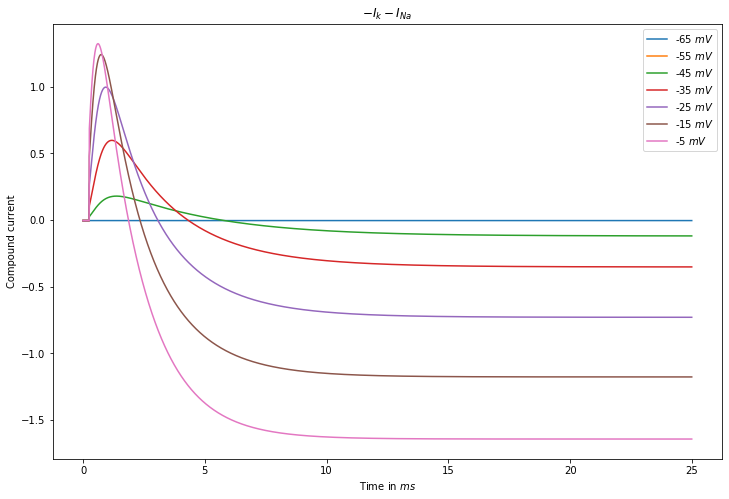

In [126]:


plt.figure(figsize = (12,8))
for mV in np.arange(-65,0,10):
    plt.plot(seconds, compound_clamp(m,h,n, 25, mV), 
            label = '{} $mV$'.format(mV))
    plt.title('$-I_k - I_{Na}$')
    plt.xlabel('Time in $ms$')
    plt.ylabel('Compound current')
    plt.legend()

This is also what I would have expected, knowing the shape of the action potential (the plot effectively shows the shape of different action potentials at different driving currents $V_c$. The cell has an overall action potential that is somewhere around -69 $mV$, so it is not surprising that we don't see any currents around voltages that are close to that potential. As the cell is depolarised, we first see an increase in current (due to the inwards flow of sodium ions as a consequence of the rapid opening of sodium channels). As a consequence of this influx the cell membrane is depolarised even further. The sodium channels then close. Sodium ions can no longer as easily enter the cell. In addition, potassium channels begin to open causing an outflow of positive charge (an outward flow), which hyperpolarises the cell, bringing it close to potassium's reversal potential.